# Algoritmos de clasificación 
### Tania Sayuri Guizado Hernandez A01640092

Borra la variable "Id" de la base de datos, ya que esta no contiene información relevante. Explica los algoritmos que utilizan los métodos de clasificación: regresión logística, Bayes y análisis de discriminate. De ser el caso muestra las ecuaciones correspondientes.

Utiliza los algoritmos de clasificación antes mencionados para predecir el tipo de planta.  Utiliza todas las variables de la base de datos como variables regresoras. Muestra la exactitud de cada modelo y su correspondiente matriz de confusión. ¿Qué modelo fue el méjor? ¿Por qué crees que se suceda esto?

In [1]:
# Cargamos las librerías que utilizaremos en la actividad
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import load_iris
import seaborn as sns

#Cargamos el dataset de la librería de sklearn.datasets
df = load_iris()

In [2]:
#X y
X = df.data
y = df.target

In [3]:
## Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

## Métodos de clasificación
### Regresión logística
La regresión logística es un algoritmo de clasificación que se utiliza cuando se desea predecir la clase de una variable categórica en función de una o más variables. La fórmula de la regresión logística es:

$P\left(y=1∣X=x\right)=1+e^{-\left(β_0+β_1x\right)}$


* $P\left(y=1∣X=x\right)$ es la probabilidad de que la instancia $X$ pertenezca a la clase dada la muestra de datos
* $β_0$ es el término de sesgo.
* $β_1$ es el coeficiente asociado a la característica $X$.

In [4]:
# Inicializar y entrenar el modelo de regresión logística
logreg = LogisticRegression(max_iter=1000, random_state=0)
logreg.fit(X_train, y_train)
# Predecir en el conjunto de prueba
logreg_preds=logreg.predict(X_test)

In [5]:
# Calcular exactitud y matriz de confusión
logreg_accuracy = accuracy_score(y_test, logreg_preds)
logreg_confusion = confusion_matrix(y_test, logreg_preds)

In [6]:
#Imprimir los resultados
print("Regresión Logística - Exactitud:", logreg_accuracy)

Regresión Logística - Exactitud: 1.0


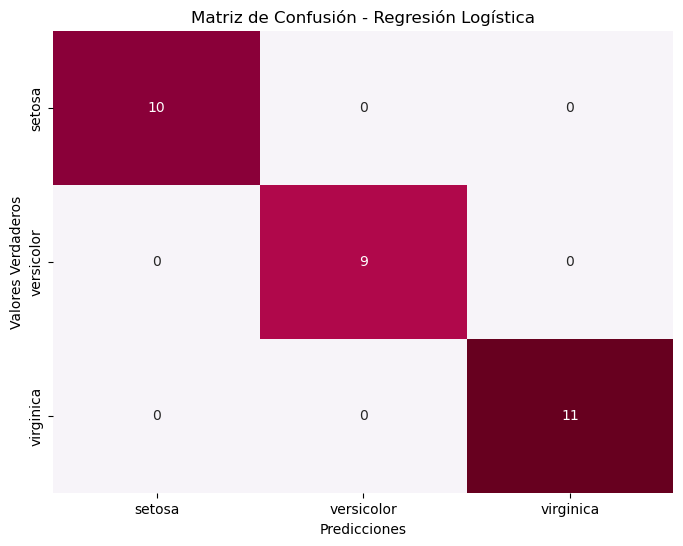

In [7]:
plt.figure(figsize=(8, 6))
sns.heatmap(logreg_confusion, annot=True, fmt="d", cmap="PuRd", cbar=False)

# Configurar etiquetas de los ejes
class_names = df.target_names
plt.xlabel('Predicciones')
plt.ylabel('Valores Verdaderos')
plt.xticks(ticks=[0.5, 1.5, 2.5], labels=class_names, fontsize=10)  
plt.yticks(ticks=[0.5, 1.5, 2.5], labels=class_names, fontsize=10) 
plt.title('Matriz de Confusión - Regresión Logística')
plt.show()

*La diagonal de la matriz de confusión para nuestro clasificador de Regresión logística demuestra que el número de muestras fueron correctamente clasificadas para cada clase (setosa, versicolor, virginica) mientras que los valores(0) que estan fuera de la diagonal principal indican que no hubo confusiones entre las clases.*

### Naïve Bayes
El clasificador Naïve Bayes se basa en el teorema de Bayes y  en el supuesto de independencia condicional entre características para un valor de clase determinado. Este mismo asume que todas las características son independientes dada la clase y que la distribución de las características se modela como una distribución Gaussiana. La formula es la siguiente:

$P\left(B∣A_i\right)=\frac{P\left(B∣A_i\right)P\left(A_i\right)}{\sum _{k=1}^n\:P\left(B∣A_k\right)P\left(A_k\right)}$

* $P\left(B∣A_i\right)$ es la probabilidad de que un evento $B$ ocurra dado que el evento $A_i$ ha ocurrido.
* $P\left(A_i\right)$ es la probabilidad de que ocurra el evento $A_i$ 
* $n$ es el número total de eventos posibles $A_1,A_2,…,A_n$.
* $P\left(B∣A_k\right)$ es la probabilidad de que ocurra el evento $B$ dado que el evento $A_k$ ha ocurrido.

In [8]:
# Inicializar y entrenar el modelo de Naïve Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)
# Predecir en el conjunto de prueba
nb_preds = nb.predict(X_test)

In [9]:
# Calcular exactitud y matriz de confusión
nb_accuracy = accuracy_score(y_test, nb_preds)
nb_confusion = confusion_matrix(y_test, nb_preds)

In [10]:
#Imprimir los resultados
print("Naive Bayes - Exactitud:", nb_accuracy)

Naive Bayes - Exactitud: 1.0


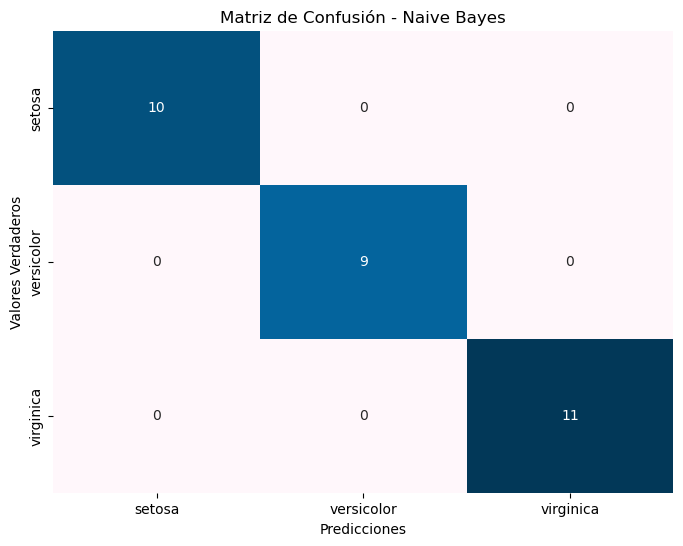

In [11]:
plt.figure(figsize=(8, 6))
sns.heatmap(nb_confusion, annot=True, fmt="d", cmap="PuBu", cbar=False)

# Configurar etiquetas de los ejes
plt.xlabel('Predicciones')
plt.ylabel('Valores Verdaderos')
plt.xticks(ticks=[0.5, 1.5, 2.5], labels=class_names, fontsize=10)  
plt.yticks(ticks=[0.5, 1.5, 2.5], labels=class_names, fontsize=10) 
plt.title('Matriz de Confusión - Naive Bayes')
plt.show()

*Al igual que la matriz de confusión de Regresión Logística, la diagonal principal de la matriz de confusión del clasificador Naive Bayes demuestra tener el mismo rendomiento perfecto al poder clasificar correctamente las muestras de cada clase.*

### Análisis de discriminante
Es un algoritmo de clasificación que divide a las variables del Data Frame en diferentes grupos. La idea principal del algoritmo es seleccionar grupos tales que la covarianza entre elementos de la misma clase sea máxima y la covarianza entre elementos de diferentes clases sea mínima.

In [12]:
# Inicializar y entrenar el modelo del análisis de discriminate
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
# Predecir en el conjunto de prueba
lda_preds = lda.predict(X_test)

In [13]:
# Calcular exactitud y matriz de confusión
lda_accuracy = accuracy_score(y_test, lda_preds)
lda_confusion = confusion_matrix(y_test, lda_preds)

In [14]:
#Imprimir los resultados
print("Análisis de Discriminante - Exactitud:", lda_accuracy)

Análisis de Discriminante - Exactitud: 1.0


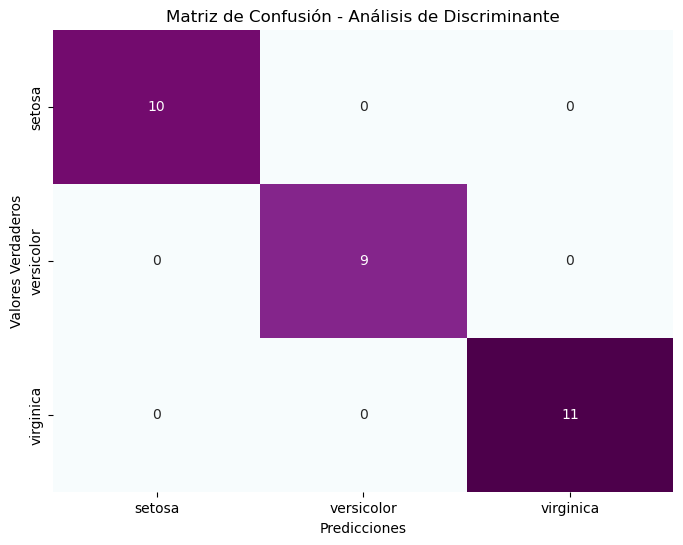

In [15]:
plt.figure(figsize=(8, 6))
sns.heatmap(lda_confusion, annot=True, fmt="d", cmap="BuPu", cbar=False)

# Configurar etiquetas de los ejes
plt.xlabel('Predicciones')
plt.ylabel('Valores Verdaderos')
plt.xticks(ticks=[0.5, 1.5, 2.5], labels=class_names, fontsize=10)  
plt.yticks(ticks=[0.5, 1.5, 2.5], labels=class_names, fontsize=10) 
plt.title('Matriz de Confusión - Análisis de Discriminante')
plt.show()

*Sin quedarse atrás el clasificador del análisis del discriminante también mostro un rendimiento perfecto y su diagonal principal también demostro poder clasificar correctamente las muestars de cada clase.*

### ¿Qué modelo fue el méjor? ¿Por qué crees que se suceda esto?
En este conjunto de datos(iris), los modelos de regresión logística, Naive Bayes y análisis del discriminante han logrado la misma exactitud y matriz de confusión. Esta similitud sugiere que los tres modelos tienen un rendimiento similar en la tarea de clasificación haciendo posible que la distribución de los datos y las suposiciones de los algoritmos favorezcan a cada modelo en igual medida. Además, el tamaño del conjunto de datos puede ser el culpable de la falta de diferencias de rendimiento puedan verse claramente. 

Cuando los modelos logran resultados idénticos, puede indicar que las características subyacentes de los datos son capturadas igualmente por cada enfoque. Por lo tanto, en esta situación, argumento que no existe ningún modelo que funcione mejor en este caso y que la decisión podría tomarse en base a otras consideraciones, como la simplicidad del modelo y el tiempo de entrenamiento.